In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
import pandas as pd
from matplotlib import cm
import seaborn as sns
import csv
from math import *
import datetime as dt
import matplotlib.dates as mdates
import windrose
from windrose import plot_windrose
import matplotlib.ticker as ticker

In [3]:
#pd.set_option('display.max_rows', 5000)

In [2]:
#Met Data Request
header = {'x-functions-key': 'P8gCa4DlO122l7gQ9ICTJ/TqAua8lSUWxT4OJ783k4LonbQpcD7e4A=='}
body2 = {
    "queries": [
    {
      "datasourceId": 1,
    
      "attributeIds": [
        3,4
      ],
      "sensorIds": [
        1
      ],
      "startDate": "20220201T00:00",
      "endDate": "20230201T23:55"
    }
  ],
  "format": "json"
}

In [3]:
Dump2 = requests.post('https://beta-awba-sensor-data-api.azurewebsites.net/api/query', json=body2, headers=header)
parse_Json1 = json.loads(Dump2.text)
y1 = parse_Json1['results'][0]['data'][0]['attributeMeasurements']

In [5]:
WndSpd = []
SpdT = []
DirT = []
WndDir = []

In [6]:
for i in y1:
    if i['abbreviation'] == 'WndDir':
        DirT.append(i['sampleDate'])
        WndDir.append(i['value'])
    elif i['abbreviation'] == 'WndSpd':
        SpdT.append(i['sampleDate'])
        WndSpd.append(i['value'])
        

In [7]:
#df = pd.read_csv('C:\\Users\\kanel\\Downloads\\3016023.csv',usecols=['HourlyWindDirection','HourlyWindSpeed', 'DATE'])
#df = df.reset_index()
df = pd.DataFrame()
df


""


In [8]:
df['DATE'] = pd.Series(SpdT)
df['speed'] = pd.Series(WndSpd)
df['direction'] = pd.Series(WndDir)

In [12]:
df.to_csv('C:\\Users\\kanel\\Documents\\Co-op Work\\Data\\BCAMP Wind Readings.csv',mode='a', columns=["DATE", "speed", "direction"], index=False, header=True)

In [8]:
df['Day'] = df['DATE'].str.split(' ').str[0]
df['Time'] = df['DATE'].str.split(' ').str[1]
df

,DATE,speed,direction,Day,Time
0,2022-01-31T16:00:00Z,0.8,277.2,2022-01-31T16:00:00Z,NaN
1,2022-01-31T16:05:00Z,0.8,228.5,2022-01-31T16:05:00Z,NaN
2,2022-01-31T16:10:00Z,0.9,225.9,2022-01-31T16:10:00Z,NaN
3,2022-01-31T16:15:00Z,1.1,221.5,2022-01-31T16:15:00Z,NaN
4,2022-01-31T16:20:00Z,1.0,224.7,2022-01-31T16:20:00Z,NaN
...,...,...,...,...,...
105361,2023-02-01T15:35:00Z,2.9,59.7,2023-02-01T15:35:00Z,NaN
105362,2023-02-01T15:40:00Z,2.9,62.6,2023-02-01T15:40:00Z,NaN
105363,2023-02-01T15:45:00Z,2.9,60.1,2023-02-01T15:45:00Z,NaN
105364,2023-02-01T15:50:00Z,2.2,64.6,2023-02-01T15:50:00Z,NaN


In [11]:
df['DATE'] = pd.to_datetime(df['DATE'], format= '%Y-%m-%dT%H:%M:%SZ')
df['DATE']

0        2022-01-31 16:00:00
1        2022-01-31 16:05:00
2        2022-01-31 16:10:00
3        2022-01-31 16:15:00
4        2022-01-31 16:20:00
                 ...        
105361   2023-02-01 15:35:00
105362   2023-02-01 15:40:00
105363   2023-02-01 15:45:00
105364   2023-02-01 15:50:00
105365   2023-02-01 15:55:00
Name: DATE, Length: 105366, dtype: datetime64[ns]

In [9]:
#df.drop('DATE', axis=1, inplace = True)
df.dropna(axis=0)
df
Ws = df[df.columns[2]].to_numpy()
Wd = df[df.columns[1]].to_numpy()
Ws.astype(float)
Wd.astype(float)
Ws = np.array(Ws, dtype=float)
Wd = np.array(Wd, dtype=float)
df


In [13]:
#df = df.rename(columns={'HourlyWindSpeed': 'speed',"HourlyWindDirection" : 'direction'})
#df = df.set_index(df.DATE)

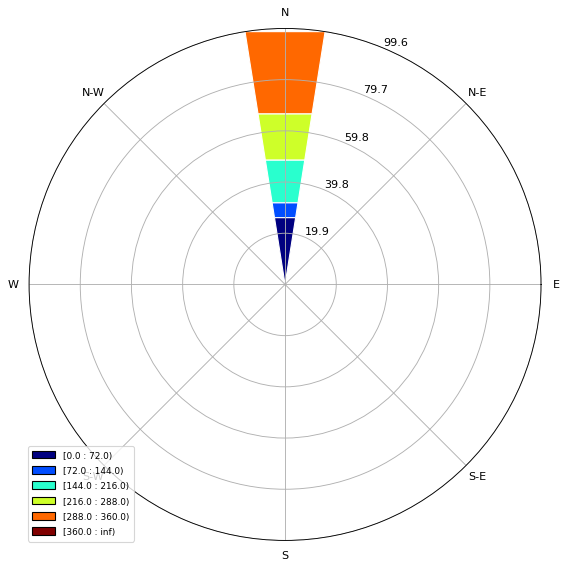

In [14]:
#Not Useful, but may be necessary later on
ax = windrose.WindroseAxes.from_ax()
ax.bar(Wd, Ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

In [20]:


#Insert desired dates in the format yyyy-mm-dd


start_date = input('Enter your start date in the format yyyy-mm-dd')
end_date = input('Enter your end date in the format yyyy-mm-dd')

start_date = str(start_date)
end_date = str(end_date)
mask = (df['Day'] > start_date) & (df['Day'] <= end_date)
df2 = df.loc[mask]

In [16]:
start_date = input('Enter your start date in the format yyyy-mm-dd')
end_date = input('Enter your end date in the format yyyy-mm-dd')

start_date = str(start_date)
end_date = str(end_date)
mask = (df['Day'] > start_date) & (df['Day'] <= end_date)
df3 = df.loc[mask]

In [23]:
len(df2)

104790

In [18]:
df2 = pd.concat([df2, df3])
df2

,DATE,speed,direction,Day,Time
96,2022-02-01 00:00:00,1.0,232.2,2022-02-01T00:00:00Z,NaN
97,2022-02-01 00:05:00,0.8,236.9,2022-02-01T00:05:00Z,NaN
98,2022-02-01 00:10:00,0.7,348.7,2022-02-01T00:10:00Z,NaN
99,2022-02-01 00:15:00,0.7,322.9,2022-02-01T00:15:00Z,NaN
100,2022-02-01 00:20:00,0.5,213.0,2022-02-01T00:20:00Z,NaN
...,...,...,...,...,...
104881,2023-01-30 23:35:00,0.7,325.2,2023-01-30T23:35:00Z,NaN
104882,2023-01-30 23:40:00,1.7,304.8,2023-01-30T23:40:00Z,NaN
104883,2023-01-30 23:45:00,1.7,327.0,2023-01-30T23:45:00Z,NaN
104884,2023-01-30 23:50:00,1.1,300.9,2023-01-30T23:50:00Z,NaN


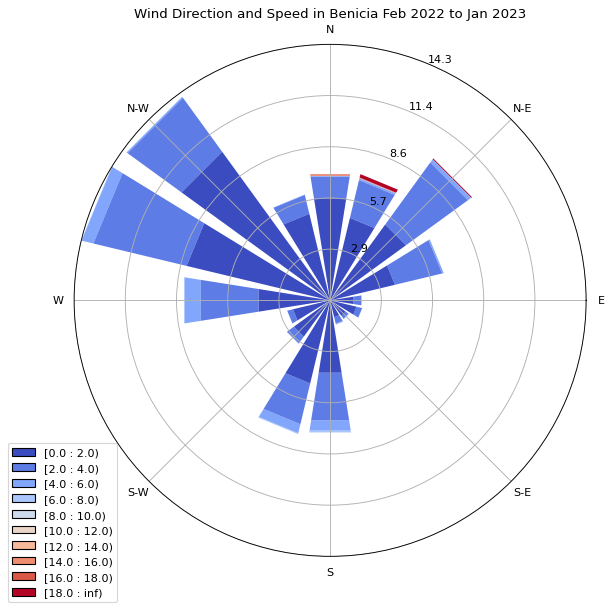

In [24]:
plot_windrose(df2['direction'], df2['speed'], kind= 'bar', normed= True, nsector=16, bins= np.arange(0.01, 20, 2),cmap = cm.coolwarm)
plt.title('Wind Direction and Speed in Benicia Feb 2022 to Jan 2023')
plt.legend(bbox_to_anchor= (-.14,-.1))

In [ ]:
df

,DATE,speed,direction,Day,Time
0,2022-01-13 00:00:00,1.6,338.9,2022-01-13T00:00:00Z,NaN
1,2022-01-13 00:05:00,2.6,329.6,2022-01-13T00:05:00Z,NaN
2,2022-01-13 00:10:00,2.1,338.1,2022-01-13T00:10:00Z,NaN
3,2022-01-13 00:15:00,1.3,330.0,2022-01-13T00:15:00Z,NaN
4,2022-01-13 00:20:00,0.8,292.0,2022-01-13T00:20:00Z,NaN
...,...,...,...,...,...
55566,2022-07-24 23:35:00,3.0,50.4,2022-07-24T23:35:00Z,NaN
55567,2022-07-24 23:40:00,3.5,48.0,2022-07-24T23:40:00Z,NaN
55568,2022-07-24 23:45:00,3.0,49.0,2022-07-24T23:45:00Z,NaN
55569,2022-07-24 23:50:00,2.5,47.3,2022-07-24T23:50:00Z,NaN


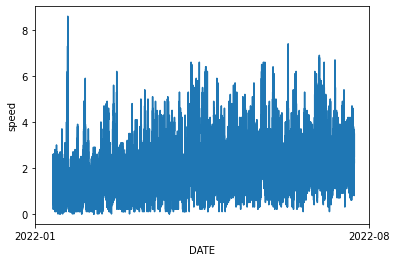

In [ ]:
freq = int(2)
fig, ax = plt.subplots()
sns.lineplot(x= df['DATE'], y= df['speed'])
plt.xticks(['2022-01-01T00:58:00', '2022-04-01T00:58:00', '2022-07-02T21:58:00'])
fmt_half_year = mdates.MonthLocator(interval=30)
ax.xaxis.set_major_locator(fmt_half_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))